# Challenge 6.1.6. Time Series Analysis

* Plot the time series, along with any logical or necessary differences to get a stationary dataset
* Generate and interpret a PACF for the time series (and/or its differences)
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
* Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

### Source

Civilian Unemployment Rate
https://fred.stlouisfed.org/series/UNRATE

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

In [9]:
employ_data = pd.read_csv('CPIAUCSL.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
employ_data['CPI'] = pd.to_numeric(employ_data.CPIAUCSL, errors='coerce')

# Remove NA's
employ_data.dropna(inplace=True)

In [10]:
employ_data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


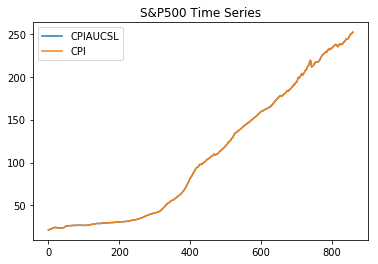

In [4]:
employ_data.plot()
plt.title('S&P500 Time Series')
plt.show()

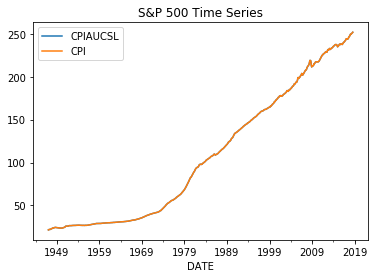

In [5]:
employ_data.index = pd.to_datetime(employ_data.DATE)
employ_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

In [6]:
employ_data['diff_1'] = employ_data.unemployment_rate - employ_data.unemployment_rate.shift()
employ_data.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'unemployment_rate'

In [ ]:
employ_data['diff_2'] = employ_data.diff_1 - employ_data.diff_1.shift()
employ_data.plot(y='diff_2')
plt.title('Unemployment Time Series')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(employ_data.unemployment_rate))
x_acf.plot(kind='bar')
plt.title("Unemployment PACF")

In [ ]:
x_acf = pd.DataFrame(pacf(employ_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Diff PACF")
plt.legend(['difference'])

In [ ]:
guess_mean = np.mean(employ_data.UNRATE)
guess_std = 3*np.std(employ_data.UNRATE)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

N = employ_data.shape[0]

In [ ]:
t = np.linspace(0, 4*np.pi, N)

data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

In [ ]:
employ_data.shape[0]

In [ ]:
plt.plot(data_first_guess, label='first guess')

In [ ]:
t

In [ ]:
employ_data.UNRATE